<h4>Features description</h4>
<p>You are required to use the following features (in the following order) to make your predictions:</p>
    <ul>
        <li>Linear $$\phi_1(\mathbf{x}) = x_1,~ \phi_2(\mathbf{x}) = x_2,~ \phi_3(\mathbf{x}) = x_3,~ \phi_4(\mathbf{x}) = x_4,~ \phi_5(\mathbf{x}) = x_5,~$$</li>
        <li>Quadratic $$\phi_6(\mathbf{x}) = x^2_1,~ \phi_7(\mathbf{x}) = x^2_2,~ \phi_8(\mathbf{x}) = x^2_3,~ \phi_9(\mathbf{x}) = x^2_4,~ \phi_{10}(\mathbf{x}) = x^2_5,~$$</li>
        <li>Exponential $$\phi_{11}(\mathbf{x}) = e^{x_1},~ \phi_{12}(\mathbf{x}) = e^{x_2},~ \phi_{13}(\mathbf{x}) = e^{x_3},~ \phi_{14}(\mathbf{x}) = e^{x_4},~ \phi_{15}(\mathbf{x}) = e^{x_5}$$</li>
        <li>Cosine $$\phi_{16}(\mathbf{x}) = \textrm{cos}(x_1),~ \phi_{17}(\mathbf{x}) = \textrm{cos}(x_2),~ \phi_{18}(\mathbf{x}) = \textrm{cos}(x_3),~ \phi_{19}(\mathbf{x}) = \textrm{cos}(x_4),~ \phi_{20}(\mathbf{x}) = \textrm{cos}(x_5)$$</li>
        <li>Constant $$\phi_{21}(\mathbf{x})=1$$</li>
</ul>
<p>
where we indicate the whole input vector with <strong>x</strong> and we use x<sub>i</sub> to denote its i<sup>th</sup> component.
<p>Your predictions are calculated as a linear function of the features above according to the following formula:</p>
<p>$$\hat{y} = w_1\phi_1(\mathbf{x}) + w_2\phi_2(\mathbf{x}) + \cdots
    w_{21}\phi_{21}(\mathbf{x}) $$</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
# Import data into dataframe

df = pd.read_csv('train.csv')
df.head()

,Id,y,x1,x2,x3,x4,x5
0,0,-6.822679,0.02,0.05,-0.09,-0.43,-0.08
1,1,-6.326290,-0.13,0.11,-0.08,-0.29,-0.03
2,2,-9.302728,0.08,0.06,-0.07,-0.41,-0.03
3,3,-7.371893,0.02,-0.12,0.01,-0.43,-0.02
4,4,-6.027647,-0.14,-0.12,-0.08,-0.02,-0.08


In [5]:
# Quadratic transformation

df['phi6']=df['x1']*df['x1']
df['phi7']=df['x2']*df['x2']
df['phi8']=df['x3']*df['x3']
df['phi9']=df['x4']*df['x4']
df['phi10']=df['x5']*df['x5']

In [7]:
# Exponential transformation

df['phi11']=np.exp(df['x1'])
df['phi12']=np.exp(df['x2'])
df['phi13']=np.exp(df['x3'])
df['phi14']=np.exp(df['x4'])
df['phi15']=np.exp(df['x5'])

In [9]:
# Cosinusodial transformation

df['phi16']=np.cos(df['x1'])
df['phi17']=np.cos(df['x2'])
df['phi18']=np.cos(df['x3'])
df['phi19']=np.cos(df['x4'])
df['phi20']=np.cos(df['x5'])

In [11]:
# Constant Feature

df['phi21']=1

In [12]:
# Final dataframe with label y and all the parameters x1 through phi21

df.head()

,Id,y,x1,x2,x3,x4,x5,phi6,phi7,phi8,...,phi12,phi13,phi14,phi15,phi16,phi17,phi18,phi19,phi20,phi21
0,0,-6.822679,0.02,0.05,-0.09,-0.43,-0.08,0.0004,0.0025,0.0081,...,1.051271,0.913931,0.650509,0.923116,0.999800,0.998750,0.995953,0.908966,0.996802,1
1,1,-6.326290,-0.13,0.11,-0.08,-0.29,-0.03,0.0169,0.0121,0.0064,...,1.116278,0.923116,0.748264,0.970446,0.991562,0.993956,0.996802,0.958244,0.999550,1
2,2,-9.302728,0.08,0.06,-0.07,-0.41,-0.03,0.0064,0.0036,0.0049,...,1.061837,0.932394,0.663650,0.970446,0.996802,0.998201,0.997551,0.917121,0.999550,1
3,3,-7.371893,0.02,-0.12,0.01,-0.43,-0.02,0.0004,0.0144,0.0001,...,0.886920,1.010050,0.650509,0.980199,0.999800,0.992809,0.999950,0.908966,0.999800,1
4,4,-6.027647,-0.14,-0.12,-0.08,-0.02,-0.08,0.0196,0.0144,0.0064,...,0.886920,0.923116,0.980199,0.923116,0.990216,0.992809,0.996802,0.999800,0.996802,1


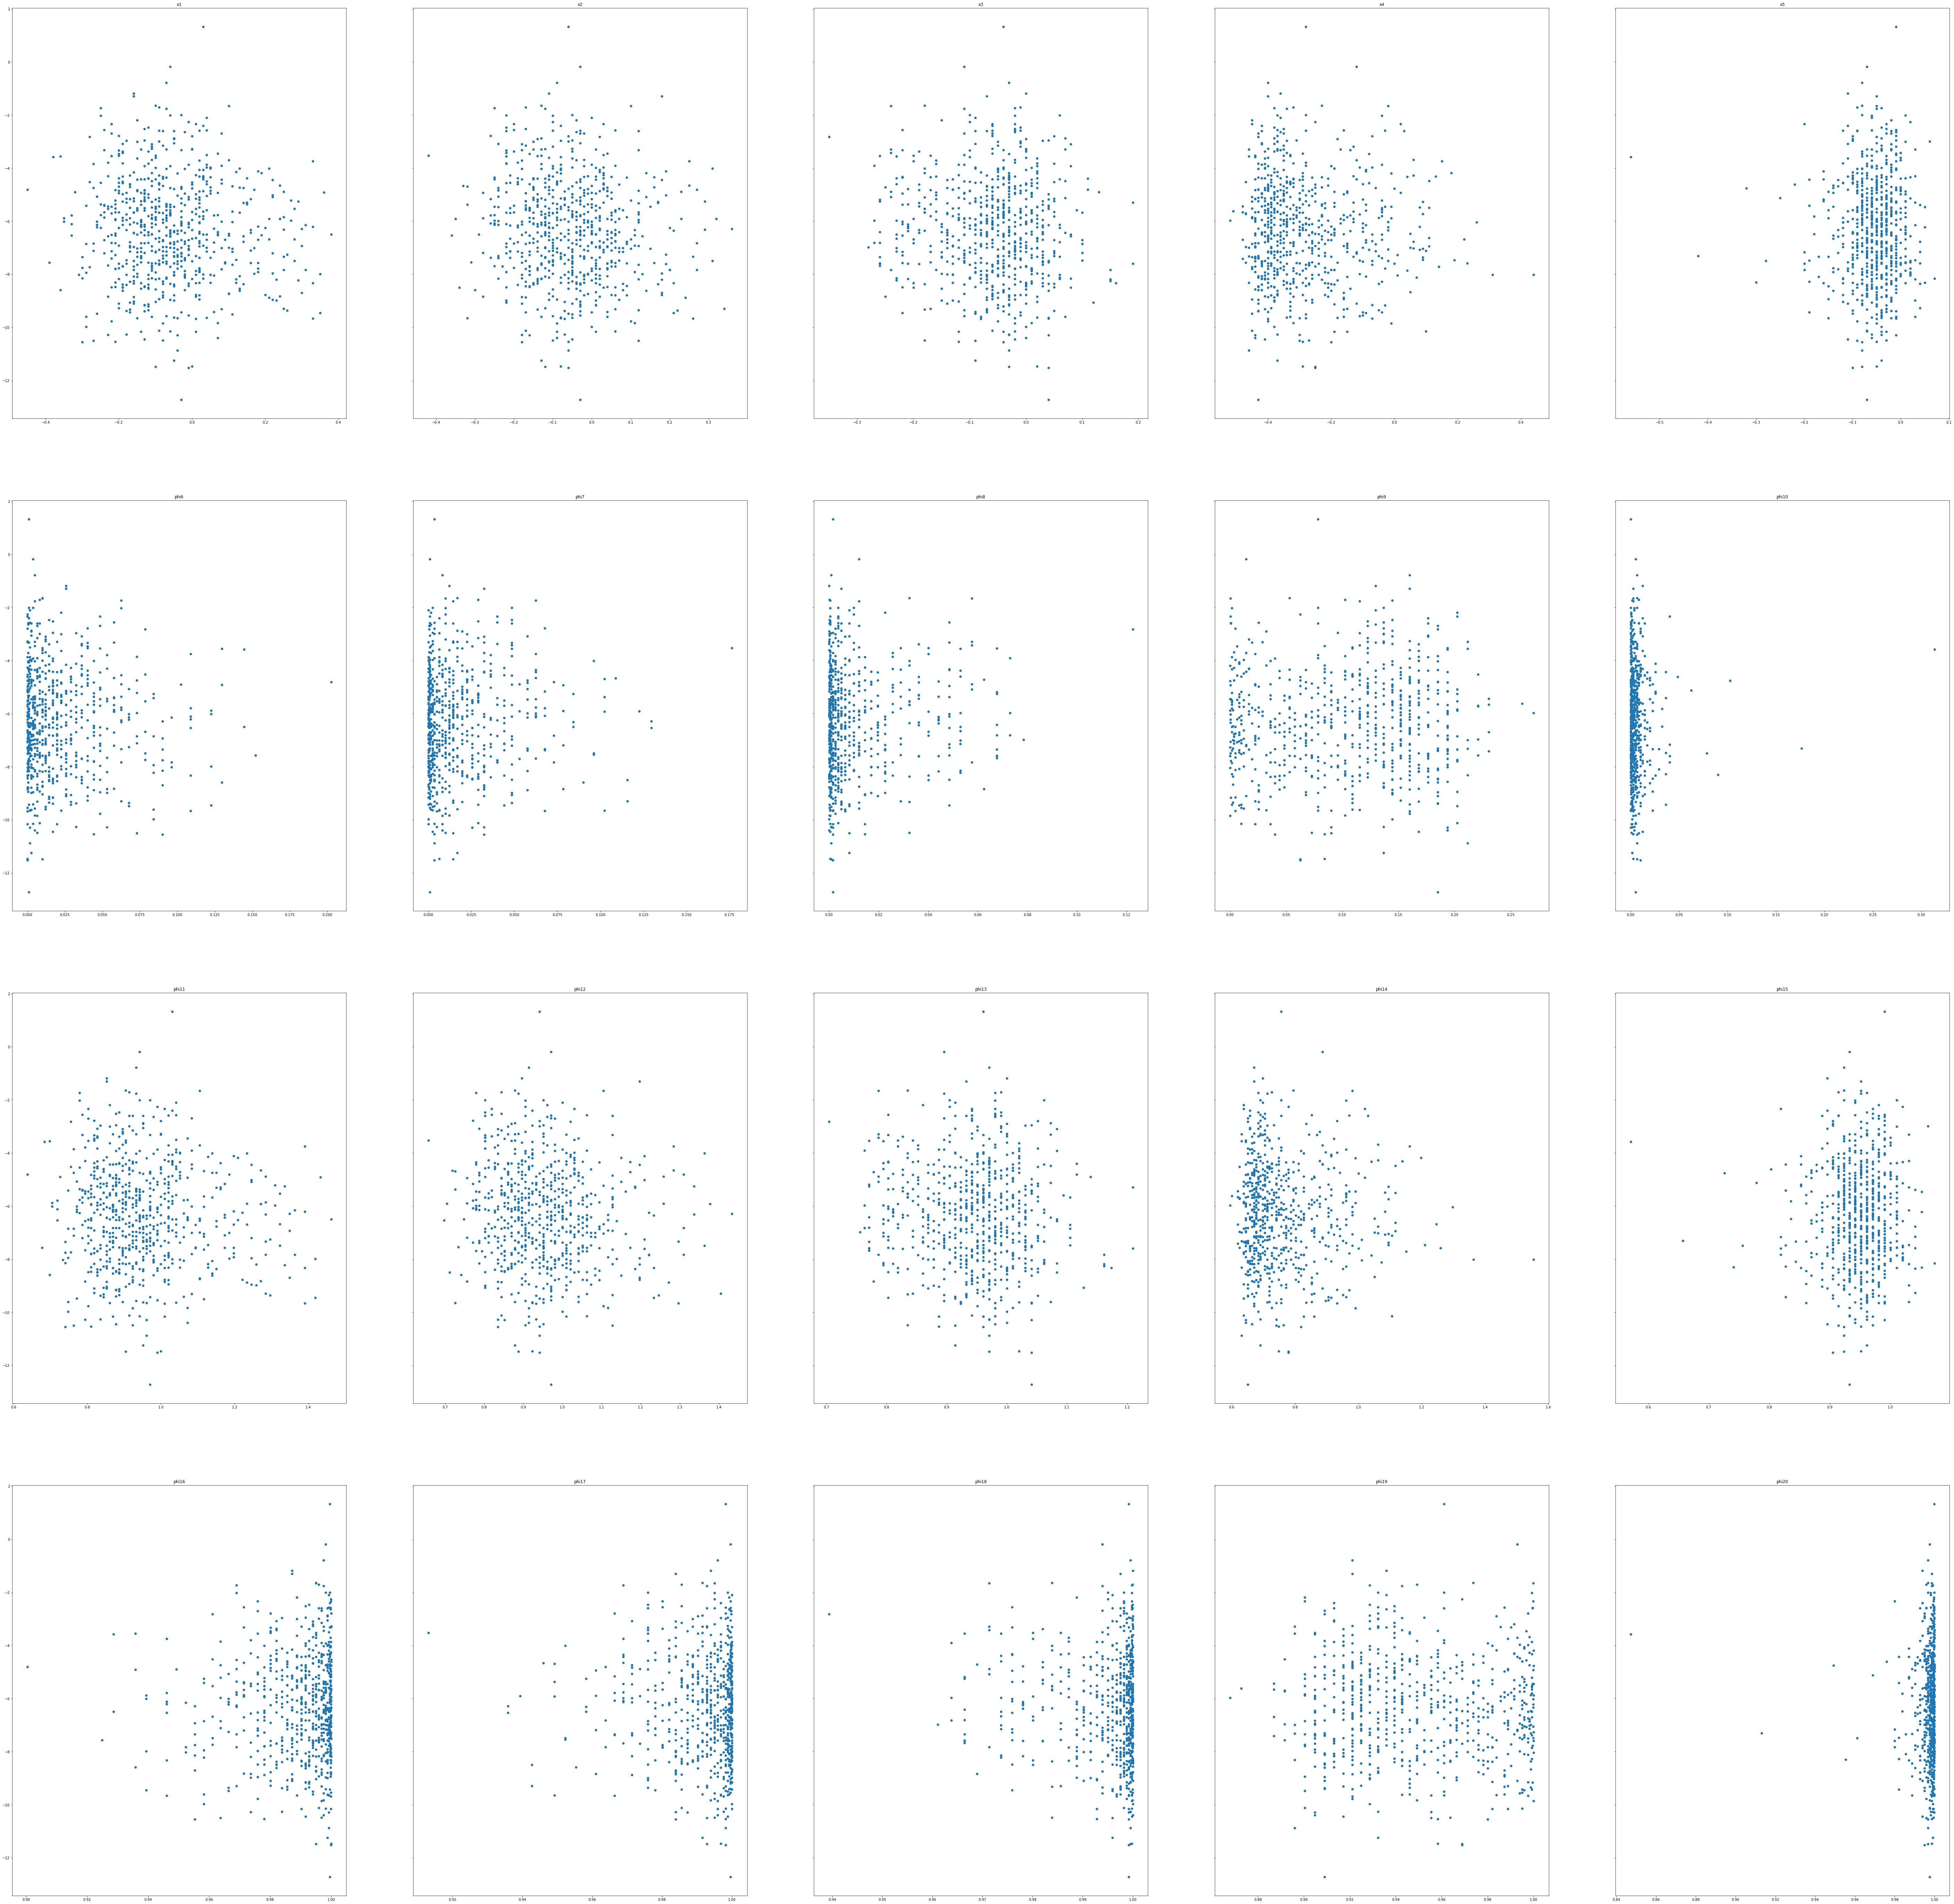

In [80]:
import matplotlib
import matplotlib.pyplot as plt

# Plot all the parameters in respect to the label y to see if there are any obvious correlations

fig, axs = plt.subplots(4, 5, sharey=True)

axs[0, 0].scatter(df['x1'], df['y'])
axs[0, 0].set_title("x1")

axs[0, 1].scatter(df['x2'], df['y'])
axs[0, 1].set_title("x2")

axs[0, 2].scatter(df['x3'], df['y'])
axs[0, 2].set_title("x3")

axs[0, 3].scatter(df['x4'], df['y'])
axs[0, 3].set_title("x4")

axs[0, 4].scatter(df['x5'], df['y'])
axs[0, 4].set_title("x5")

axs[1, 0].scatter(df['phi6'], df['y'])
axs[1, 0].set_title("phi6")

axs[1, 1].scatter(df['phi7'], df['y'])
axs[1, 1].set_title("phi7")

axs[1, 2].scatter(df['phi8'], df['y'])
axs[1, 2].set_title("phi8")

axs[1, 3].scatter(df['phi9'], df['y'])
axs[1, 3].set_title("phi9")

axs[1, 4].scatter(df['phi10'], df['y'])
axs[1, 4].set_title("phi10")

axs[2, 0].scatter(df['phi11'], df['y'])
axs[2, 0].set_title("phi11")

axs[2, 1].scatter(df['phi12'], df['y'])
axs[2, 1].set_title("phi12")

axs[2, 2].scatter(df['phi13'], df['y'])
axs[2, 2].set_title("phi13")

axs[2, 3].scatter(df['phi14'], df['y'])
axs[2, 3].set_title("phi14")

axs[2, 4].scatter(df['phi15'], df['y'])
axs[2, 4].set_title("phi15")

axs[3, 0].scatter(df['phi16'], df['y'])
axs[3, 0].set_title("phi16")

axs[3, 1].scatter(df['phi17'], df['y'])
axs[3, 1].set_title("phi17")

axs[3, 2].scatter(df['phi18'], df['y'])
axs[3, 2].set_title("phi18")

axs[3, 3].scatter(df['phi19'], df['y'])
axs[3, 3].set_title("phi19")

axs[3, 4].scatter(df['phi20'], df['y'])
axs[3, 4].set_title("phi20")


plt.show()

In [16]:
# Separate the dataframe into labels y and parameters X

y = np.array(df['y'])
X = (df.to_numpy())[:,2:]
y,X

(array([ -6.82267935,  -6.32629047,  -9.30272825,  -7.3718925 ,
         -6.027647  ,  -8.44089064,  -5.72998344,  -7.54124475,
         -6.70476914,  -7.48440329,  -2.51599424,  -6.16006699,
         -8.33514872,  -4.59614446,  -8.73864536,  -5.84116948,
        -10.11650711,  -8.94255801,  -5.66682684,  -4.84434154,
         -5.87328893,  -6.51645627,  -7.00682289,  -9.39064276,
         -7.9239573 ,  -7.30744627,  -4.29600304,  -5.52515761,
         -9.82705084,  -5.91262789,  -7.32245977,  -8.0114618 ,
         -5.14276441,  -4.2980488 ,  -4.44135631,  -7.91364854,
         -7.09357003,  -5.66715944,  -4.42024724,  -7.30414984,
         -6.92361491,  -8.6961307 ,  -8.97856478,  -4.81579979,
         -3.36310741,  -6.08089298,  -4.11285047,  -5.39922091,
         -7.7798417 ,  -5.36490463,  -3.14627999,  -6.49917653,
         -3.19267081, -11.46477271,  -4.57905162,  -6.013521  ,
         -6.98680681,  -6.14042986, -10.25792856,  -6.94006212,
         -5.50586002,  -3.07566016,  -7.

In [66]:
from sklearn import metrics
from sklearn.model_selection import KFold

# Did Ridge regression with several different values for the complexity parameter. Very small values do a better
# job at approximating the training set but seem to overfit quite a bit with coefficients getting very large.
# Settled for alpha = 0.01 in the final solution, which seemed to approximate the training function well without
# having the coefficients explode.

# Also used 10-fold split for cross validation

kf = KFold(n_splits=10)

# Define different ridge models with different value for lambda

lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 200]
models = []
for l in lambdas:
    models.append(linear_model.Ridge(alpha = l))

# Do 10-fold ridge regression with the splits and models previously defined. Take the mean of the resulting RMSE
# and store that in a list


for clf in models:
    for train_index, test_index in kf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # print("MODEL:", clf)
        clf.fit(X_train, y_train)
        
print('==RMSE for different alphas using Ridge Regression==')
for el in models:
    print(el, mean_squared_error(y, el.predict(X)))
    print('Coefficients:', el.coef_)

==RMSE for different alphas using Ridge Regression==
Ridge(alpha=0.001) 3.7650067078533995
Coefficients: [  6.92924265 -12.62390754   1.45205173  16.86830754   3.78704805
  -1.79225435  -2.1328288    4.17474574   4.85479689   8.83261633
  -7.2404603   10.7939778   -3.89237361 -17.0560701   -1.83758204
  -0.15522904   0.1286206   -1.24901594  -4.59669668  -1.78009819
   0.        ]
Ridge(alpha=0.01) 3.768615231434331
Coefficients: [ 1.43679983 -2.72853589 -1.44934408  2.25939384  0.08693899 -3.43747243
  1.9333391   2.43866562  0.43073407  6.12745934 -1.80421957  0.97286653
 -1.04587903 -2.59066185  1.67295302  1.61147647 -1.05673872 -1.12874176
 -0.30736849 -2.7264287   0.        ]
Ridge(alpha=0.1) 3.7725985123813275
Coefficients: [ 0.62956941 -1.46266608 -1.58436946  0.13649546 -0.18745173 -2.84999271
  1.72801864  1.28202589 -0.31162589  3.00804396 -0.95809724 -0.34329591
 -1.05553466 -0.51868063  0.96542408  1.40554475 -0.86662081 -0.62946718
  0.14311993 -1.43973944  0.        ]
Ri

In [67]:
# Also tried an approach using LASSO to regularize the coefficients but found that results were not satisfactory
# since coefficients either vanished completely or were too large for a general solution.

# Define different linear models with different value for alpha in LASSO

lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]
lassoModels = []
for l in lambdas:
    lassoModels.append(linear_model.Lasso(alpha = l))

# Do 10-fold regression with the splits and models previously defined

for clf in lassoModels:
    for train_index, test_index in kf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # print("MODEL:", clf)
        clf.fit(X_train, y_train)
        
print('==RMSE for different alphas using Lasso==')
for el in lassoModels:
    print(el, mean_squared_error(y, el.predict(X)))
    print(el.coef_)

==RMSE for different alphas using Lasso==
Lasso(alpha=0.0001) 3.7694270148601356
[-0.         -1.76020297 -2.55794772  0.          0.         -4.7929735
  2.73884992  2.00467531 -0.34394601  7.22791505 -0.36714872 -0.
 -0.         -0.32004486  1.67509059  0.         -0.         -0.
  0.         -0.          0.        ]
Lasso(alpha=0.001) 3.7838640423750727
[-0.         -1.93633939 -2.61639819 -0.         -0.         -2.17452102
  0.          0.         -0.          0.         -0.1912664  -0.
 -0.         -0.17509252 -0.          0.         -0.         -0.
  0.         -0.          0.        ]
Lasso(alpha=0.01) 3.8096850169477667
[-0.         -1.28031851 -1.00279591 -0.          0.         -0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.         -0.          0.        ]
Lasso(alpha=0.1) 3.870961160712884
[-0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0.  0.  0. -0. -0.
 -0. -0.  0.]
Lasso(al

In [71]:
models[1].coef_

array([ 1.43679983, -2.72853589, -1.44934408,  2.25939384,  0.08693899,
       -3.43747243,  1.9333391 ,  2.43866562,  0.43073407,  6.12745934,
       -1.80421957,  0.97286653, -1.04587903, -2.59066185,  1.67295302,
        1.61147647, -1.05673872, -1.12874176, -0.30736849, -2.7264287 ,
        0.        ])

In [79]:
# Write final results into a CSV

out = pd.DataFrame(models[1].coef_)
out.to_csv("submission.csv", header=False, index=False)